####CSC 478 Final Project (Autumn 2017)

####Name: 
Kevin Kai Chung Ying

####Date:
Oct/21/2017

####Data Analysis

####Description of dataset:
The Datasets were donated by KKBox through Kaggle.com. There are 5 different datasets are provided including 1 train, 1 test, 1 songs , 1 songs extra info, members dataset. The song list includes about 2.6 mil of songs track with songs’s length, gene_id, artist_name, composer, lyricist, language. KKBox is an Asia’s leading music streaming service holds about 30 million song track Asia-pop music library. The purpose of particular dataset donation aims to look for a better recommendation system for music engine for their new customers. The potential analysis target is to predict which songs would be users’ favorite and chance to repetitively listen the SAME song within a month. The provided dataset also includes a member info table which contains members’ location, gender, register channel, register date and expiration date.

####Classification Target
•	Target=1 means user is repetitively listening SAME event(s) triggered within a month after the very first observable listening event. 
•	Target=0 means otherwise.

####Attributes from Training and Testing Set
•	6 Attributes in the Dataset
o	user_id (Char), song_id (Char),  source_system_tab(char, 2 variations), source_screen_name (char, 2 variations), source_type(char, 2 variations)
•	7377418 rows of Records on the Training dataset
•	The aggregation of tables will be necessary for the analysis.

####Classification Analysis:


####Algorithm still not confirmed, will depends on the accuracy.
•	KNN (User-based / Item-based / Content Based Collaborative System)
•	Correlation between users
•	Cosine Similarity
•	MAE or RMSE Evaluation





In [276]:
import numpy as np
import pandas as pd
import urllib, time, json, sqlite3

In [ ]:
music_train = music_train.reindex(np.random.permutation(music_train.index))


###Prepare and aggregate Dataset: 

####Create tables in sqlite and then utilize existing tables to aggregate attributes for the tables

In [277]:
import sqlite3
from sqlite3 import OperationalError
import urllib, time, json, sqlite3

In [278]:
#Create framework of the Table "Train"
train='''Create Table Train(
    customer_id VARCHAR(100),
    song_id VARCHAR(100),
    source_system_tab VARCHAR(20),
    source_screen_name VARCHAR(30),
    source_type VARCHAR(30),
    Target integer(2),
    
    CONSTRAINT Train_PK Primary Key (customer_id, song_id)

)
'''
#Create framework of the Table "Members"
mem='''Create Table Members(

    customer_id VARCHAR(100),
    city INTEGER(5),
    age INTEGER(5),
    gender VARCHAR(2),
    registered_via integer(10),
    reg_time VARCHAR(2),
    exp_date VARCHAR(2),
 
    CONSTRAINT Members_PK PRIMARY KEY (customer_id)
)
'''
#Create framework of the Table "Songs"
songs='''Create Table Songs(
    
    song_id VARCHAR(100),
    song_length INTEGER(20),
    genre_ids INTEGER(20),
    artist_name VARCHAR(100),
    composer VARCHAR(100),
    lyricist VARCHAR(100),
    language INTEGER(10),
    
    CONSTRAINT Songs_PK PRIMARY KEY (song_id)
)
'''

####Create the sqlite database to store the Tables created above

In [280]:
conn=sqlite3.connect('project.db')
c=conn.cursor()

c.execute('Drop Table  if exists Train;')
c.execute(train)

c.execute('Drop Table  if exists Members;')
c.execute(mem)

c.execute('Drop Table  if exists Songs;')
c.execute(songs)

conn.commit()
conn.close()


####(ETL)Extract the original data from "train.csv" to a list "train_lst"

In [281]:
start=time.time()
count=0
source=open ('./Data/Music/train.csv')
train_lst=[]

content=source.read()
lines=content.strip().split('\n')

for line in lines:
    line=line.strip().split(',')
    train_lst.append(line)
    count+=1

train_lst=train_lst[1:] #Skip the first row(attributes)    
end=time.time()
end-start

37.31982207298279

In [282]:
print(len(train_lst))
train_lst[0:3]

7377418


[['FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=',
  'BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=',
  'explore',
  'Explore',
  'online-playlist',
  '1'],
 ['Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=',
  'bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=',
  'my library',
  'Local playlist more',
  'local-playlist',
  '1'],
 ['Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=',
  'JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=',
  'my library',
  'Local playlist more',
  'local-playlist',
  '1']]

####(ETL)Extract the original data from "members.csv" to a list "members_lst"

In [283]:
start=time.time()
count=0
source=open ('./Data/Music/members.csv')
members_lst=[]

content=source.read()
lines=content.strip().split('\n')

for line in lines:
    line=line.strip().split(',')
    members_lst.append(line)
    count+=1

members_lst=members_lst[1:] #Skip the first row(attributes)    
end=time.time()

end-start

1.1472649574279785

In [284]:
print(len(members_lst))
members_lst[0:3]

34403


[['XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=',
  '1',
  '0',
  '',
  '7',
  '20110820',
  '20170920'],
 ['UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=',
  '1',
  '0',
  '',
  '7',
  '20150628',
  '20170622'],
 ['D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=',
  '1',
  '0',
  '',
  '4',
  '20160411',
  '20170712']]

####(ETL)Extract the original data from "songs.csv" to a list "songs_lst"

In [285]:
start=time.time()
count=0
source=open ('./Data/Music/songs.csv')
songs_lst=[]

content=source.read()
lines=content.strip().split('\n')

for line in lines:
    line=line.strip().split(',')
    songs_lst.append(line)
    count+=1

songs_lst=songs_lst[1:] #Skip the first row(attributes)    
end=time.time()
end-start

10.556016206741333

In [18]:
print(len(songs_lst))
print(songs_lst[0:3])

2296833
[['CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=', '247640', '465', '張信哲 (Jeff Chang)', '董貞', '何啟弘', '3.0'], ['o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=', '197328', '444', 'BLACKPINK', 'TEDDY|  FUTURE BOUNCE|  Bekuh BOOM', 'TEDDY', '31.0'], ['DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=', '231781', '465', 'SUPER JUNIOR', '', '', '31.0']]


####(ETL) Extract the data from the list "members_lst" and Load to the table into database

In [286]:
#Insert the train table data into sqlite for future data aggregation
start=time.time()
conn=sqlite3.connect('project.db')
c=conn.cursor()
c.executemany('INSERT OR IGNORE INTO Members VALUES (?,?,?,?,?,?,?);', members_lst)        
conn.commit()
end=time.time()
end-start

0.5544729232788086

####(ETL) Extract the data from the list "songs_lst" and Load to the table into database

In [287]:
#Insert the songs table data into sqlite for future data aggregation
count=0
for line in songs_lst:
    try:
        c.execute('INSERT OR IGNORE INTO Songs VALUES (?,?,?,?,?,?,?);', line)
        count+=1
    except:
        print(count)
conn.commit()

605199


In [217]:
####(ETL) Extract the data from the list "train_lst" and Load to the table into database

In [288]:
#Insert the train_sys table data into sqlite for future data aggregation

c.executemany('INSERT OR IGNORE INTO Train VALUES (?,?,?,?,?,?);', train_lst)
conn.commit()


In [220]:
####(ETL)Aggregate the tables from Train, Songs, Members and Load into the CSV files for the analysis.

In [289]:
start=time.time()
#Query for all the attributes from all the Tables corresponding to the customer_id an Songs_id
query1='''select T.customer_id, T.Song_id, T.source_system_tab,T.source_screen_name, T.source_type,
M.city, M.age, M.gender,M.registered_via, M.reg_time, exp_date,
s.genre_ids,s.song_length,s.language,s.artist_name,s.composer, s.lyricist, T.target
from Train T 
left Join Members M on T.customer_id=M.customer_id
Left join songs s on s.song_id=t.song_id;
'''
#Query for all the attributes from the Train Table
que_train='''Select * from Train'''

#Query for all the attributes from the Songs Table
que_songs='''select t.Song_id, 
s.genre_ids,s.song_length,s.language,s.artist_name,s.composer, s.lyricist, T.target
from Songs t
Left Join songs s on t.song_id=s.song_id'''

#Query all the attributes from the members Table
que_members='''Select t.customer_id,
M.city, M.age, M.gender,M.registered_via, M.reg_time, exp_date, t.target
from Train t, Members m, 
Left Join Members m on m.customer_id=t.customer_id'''

#Add the Gender, Language, genre_ids to the Train Tables
query2='''
Select 
t.customer_id,t.Song_id,t.target,T.source_system_tab,T.source_screen_name, T.source_type,
M.gender, 
s.language,s.genre_ids,s.artist_name
from Train t,songs s, Members m
on m.customer_id=t.customer_id and t.song_id=s.song_id'''

#Load the above queries to the CSV files for future use.
#pd.read_sql_query(que_songs, conn).to_csv('que_songs.csv', index=True)
pd.read_sql_query(query2, conn).to_csv('query2.csv', index=True)
end=time.time()
print("Time taken is ", end-start)

Time taken is  353.4293489456177


####Read the CSV file which was prepared from the above Query

In [222]:
import pandas as pd
import numpy as np
original_tbl=pd.read_csv('''query1.csv''', na_values=["?"])
#train_tbl=pd.read_csv('''que_train.csv''', na_values=["?"])
#songs_tbl=pd.read_csv('''que_songs.csv''', na_values=["?"])
#members_tbl=pd.read_csv('''que_members.csv''', na_values=["?"])
#train2_tbl=pd.read_csv('''query2.csv''', na_values=["?"])

In [223]:
print(original_tbl.shape)
original_tbl.head(3)

(7377418, 19)


,Unnamed: 0,customer_id,song_id,source_system_tab,source_screen_name,source_type,city,age,gender,registered_via,reg_time,exp_date,genre_ids,song_length,language,artist_name,composer,lyricist,Target
0,0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,359,206471.0,52.0,Bastille,Dan Smith| Mark Crew,NaN,1
1,1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,1259,284584.0,52.0,Various Artists,NaN,NaN,1
2,2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,1259,225396.0,52.0,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,1


#Basic Data Analysis for attributes in all Tables (Train, Members, Songs)

In [224]:
#Copy the original dataset to aother variable to avoid any changes to the original dataset (ALL Attriutes)
music_tbl=original_tbl.copy()
#Drop the original row ID column
music_tbl.drop('Unnamed: 0',axis=1,inplace=True)
#Statistics of all the attributes (Numeric and Categorical)
music_tbl.describe(include='all')

,customer_id,song_id,source_system_tab,source_screen_name,source_type,city,age,gender,registered_via,reg_time,exp_date,genre_ids,song_length,language,artist_name,composer,lyricist,Target
count,7377418,7377418,7359047,6962614,7355879,7.377418e+06,7.377418e+06,4415939,7.377418e+06,7.377418e+06,7.377418e+06,7259039,7.377380e+06,7.377380e+06,7377380,5701740,4198611,7.377418e+06
unique,30755,359966,9,20,12,NaN,NaN,2,NaN,NaN,NaN,572,NaN,NaN,40586,76070,33893,NaN
top,MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,NaN,NaN,male,NaN,NaN,NaN,465,NaN,NaN,Various Artists,周杰倫,阿信,NaN
freq,5819,13973,3684730,3228202,2261399,NaN,NaN,2297623,NaN,NaN,NaN,3717730,NaN,NaN,303617,201910,151301,NaN
mean,NaN,NaN,NaN,NaN,NaN,7.511399e+00,1.753927e+01,NaN,6.794068e+00,2.012810e+07,2.017157e+07,NaN,2.451213e+05,1.860954e+01,NaN,NaN,NaN,5.035171e-01
std,NaN,NaN,NaN,NaN,NaN,6.641625e+00,2.155447e+01,NaN,2.275774e+00,3.017281e+04,3.869831e+03,NaN,6.734489e+04,2.117690e+01,NaN,NaN,NaN,4.999877e-01
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,-4.300000e+01,NaN,3.000000e+00,2.004033e+07,1.970010e+07,NaN,1.393000e+03,-1.000000e+00,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,NaN,4.000000e+00,2.011070e+07,2.017091e+07,NaN,2.147260e+05,3.000000e+00,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,5.000000e+00,2.100000e+01,NaN,7.000000e+00,2.013102e+07,2.017093e+07,NaN,2.418120e+05,3.000000e+00,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,1.300000e+01,2.900000e+01,NaN,9.000000e+00,2.015102e+07,2.017101e+07,NaN,2.721600e+05,5.200000e+01,NaN,NaN,NaN,1.000000e+00


####As we can see, there are Numeric and Categorical Attributes in the datasets, further data exploration below to decide which attributes would be include in the Classification part.

In [24]:
#Remove age values Below ZERO and Above 144 (Be Real)
#set(music_tbl['age'])
music_tbl.drop(music_tbl[music_tbl['age']<=0].index,axis=0,inplace=True)
music_tbl.drop(music_tbl[music_tbl['age']>144].index,axis=0,inplace=True)

In [27]:
#Categorized the 'Age' attributes values to 4 category
music_tbl['age']=pd.qcut(music_tbl.age,[0, .1, .21,0.31, .45, 1.0],['0-15','16-30','31-45','46-65','>65']) 

#Categorized the "Song_Length" attributes values to 4 category
music_tbl['song_length']=pd.qcut(music_tbl.song_length,[0, .25, .5, .75, 1.],['short','med_short','mid_long','long'])

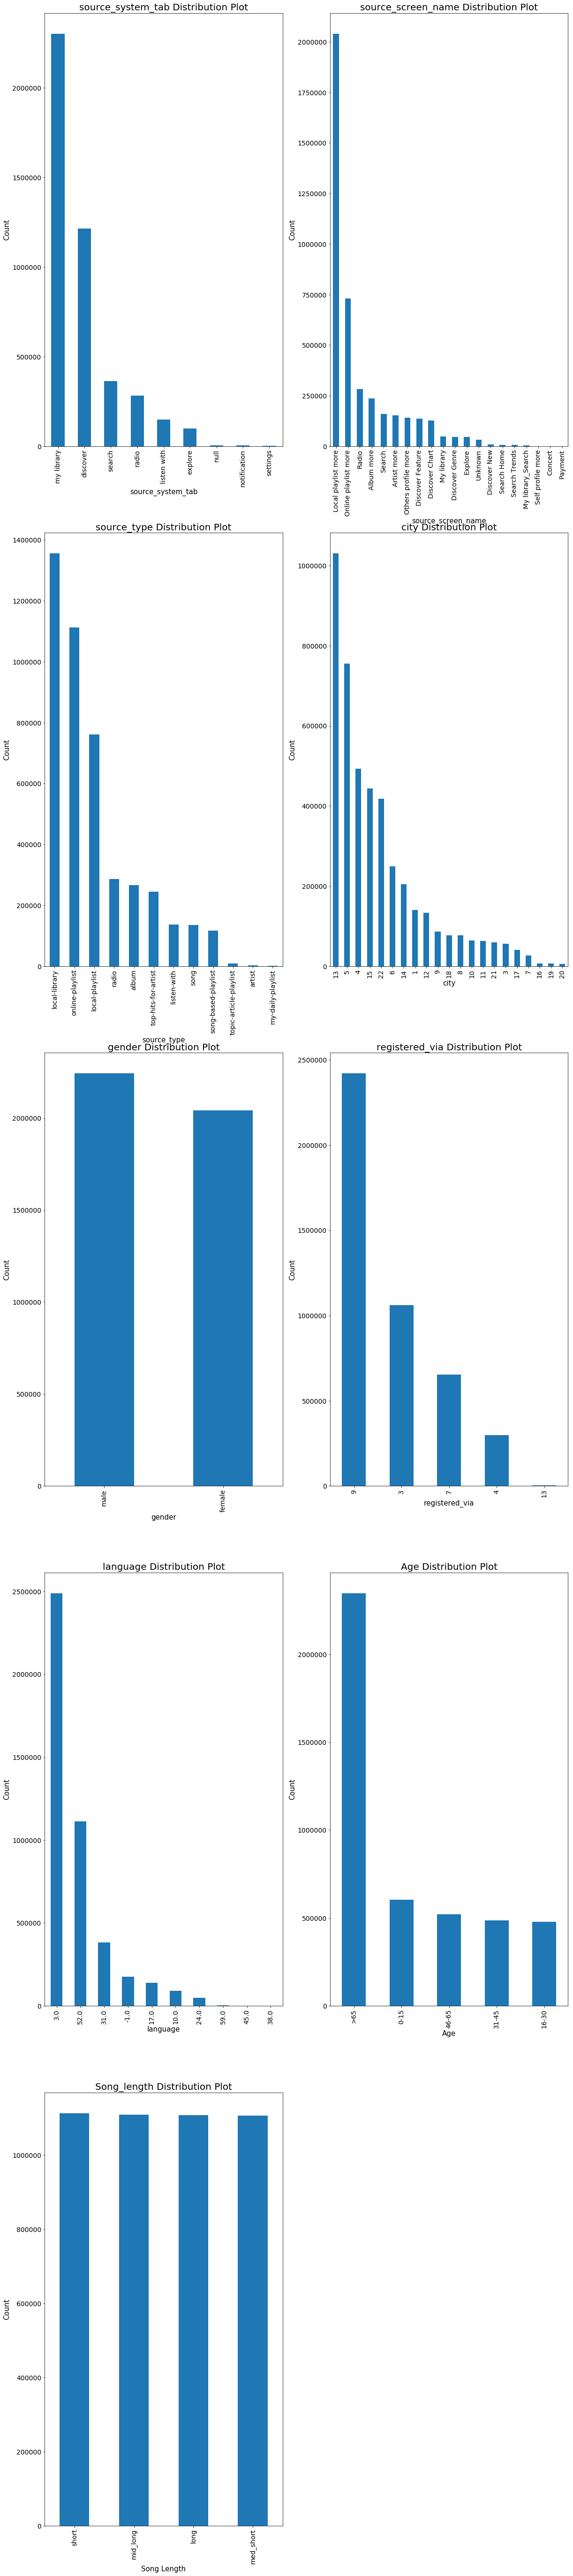

In [30]:
#Check out the distribution of different attributes in the dataset

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20, 180))
# Create an Axes object.

ax1 = fig.add_subplot(9,2,1) # one row, two column, first plot
# Plot the data.
music_tbl['source_system_tab'].value_counts().plot(kind='bar')
ax1.set_title("source_system_tab Distribution Plot", size=20)
ax1.set_xlabel("source_system_tab", size=15)
ax1.set_ylabel("Count", size=15)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

ax2 = fig.add_subplot(9,2,2)
music_tbl['source_screen_name'].value_counts().plot(kind='bar')
ax2.set_title("source_screen_name Distribution Plot", size=20)
ax2.set_xlabel("source_screen_name", size=15)
ax2.set_ylabel("Count", size=15)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

ax3 = fig.add_subplot(9,2,3)
music_tbl['source_type'].value_counts().plot(kind='bar')
ax3.set_title("source_type Distribution Plot", size=20)
ax3.set_xlabel("source_type", size=15)
ax3.set_ylabel("Count", size=15)
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)


ax4 = fig.add_subplot(9,2,4)
music_tbl['city'].value_counts().plot(kind='bar')
ax4.set_title("city Distribution Plot", size=20)
ax4.set_xlabel("city", size=15)
ax4.set_ylabel("Count", size=15)
ax4.tick_params(axis='x', labelsize=14)
ax4.tick_params(axis='y', labelsize=14)

ax5 = fig.add_subplot(9,2,5)
music_tbl['gender'].value_counts().plot(kind='bar')
ax5.set_title("gender Distribution Plot", size=20)
ax5.set_xlabel("gender", size=15)
ax5.set_ylabel("Count", size=15)
ax5.tick_params(axis='x', labelsize=14)
ax5.tick_params(axis='y', labelsize=14)

ax6 = fig.add_subplot(9,2,6)
music_tbl['registered_via'].value_counts().plot(kind='bar')
ax6.set_title("registered_via Distribution Plot", size=20)
ax6.set_xlabel("registered_via", size=15)
ax6.set_ylabel("Count", size=15)
ax6.tick_params(axis='x', labelsize=14)
ax6.tick_params(axis='y', labelsize=14)

ax7 = fig.add_subplot(9,2,7)
music_tbl['language'].value_counts().plot(kind='bar')
ax7.set_title("language Distribution Plot", size=20)
ax7.set_xlabel("language", size=15)
ax7.set_ylabel("Count", size=15)
ax7.tick_params(axis='x', labelsize=14)
ax7.tick_params(axis='y', labelsize=14)

ax8 = fig.add_subplot(9,2,8)
music_tbl['age'].value_counts().plot(kind='bar')
ax8.set_title("Age Distribution Plot", size=20)
ax8.set_xlabel("Age", size=15)
ax8.set_ylabel("Count", size=15)
ax8.tick_params(axis='x', labelsize=14)
ax8.tick_params(axis='y', labelsize=14)

ax9 = fig.add_subplot(9,2,9)
music_tbl['song_length'].value_counts().plot(kind='bar')
ax9.set_title("Song_length Distribution Plot", size=20)
ax9.set_xlabel("Song Length", size=15)
ax9.set_ylabel("Count", size=15)
ax9.tick_params(axis='x', labelsize=14)
ax9.tick_params(axis='y', labelsize=14)

####source_system_tab:KKBox defines this is the tab that shows the event was triggered and this function is used to categorize the KKBox App function - According to the above plot, we could observe that "my library" and "discover" are majorly dominated the count in this attribute. In other words, most of the event is triggered in the "my library" mode and the second most of event is triggered by "discover" mode. By looking at this stat, we can rougly guess if songs are store in "my library" or found from "discover", there is a quite high of chance the songs would be picked up by users.

####source_screen_name: KKBox defines this is the tab where the screen is being seen when the event was trigger - "Local playlist more" is apparently the layout users stay on when the event is triggered. Its count is roughly 3x times more than the layout in the second place which is "online playlist more". As we've seen, the result makes sense to me because users are mostly like to download songs to their playlist to listen (Especially for their favorite ones). Other than that, I guess everyone knows that online musice is very popular now, users could find various channels online to get sonngs. 

####"source_type": KKBox defines this is the entry-point where users first get the songs loading - Three major type of sources which are "local-library", "online-playlist" and "local-playlist" we could observe in the plot. This outcome is very consistent to the above "source_screen_name" and "source_system_tab" plots.  Local library source and onlne playlist are ranked top on the songs type. These could imply that users are mostly start the event (i.e. listen the songs) in these 2 channels rather than other sources channels (e.g. radio etc.).

####City: KKBox did not reveal the real name of the city on the dataset. For this reason, we could only look at the city code in the plot - It indicates city 13 have the most of users which are almost twice more users than other cities. The second city with great count of users is City 5. I would guess that KKBox would have get big part of business if they could advertise properly in these 2 cities. On the contrary, it is a good idea to increase their effort to spread their brand in the rest of cities which have small amount of users in order to grow their business.

####Gender: This plot is quite simple that the count of Male users is slightly more then Female. I would say that this result is not a very relevant to read any particular habit out of users.

####"registered_via": This tab shows the method where the users register to KKBox. The same as City attribute, they do no reveal the real name of the registration method. The method 9 is the most common way users register to KKBox and its count is couple fold of other register method. And I would think that this attribute might not be a predictor to the user song-listen habit.

####"language": This attribute is telling us what language the songs are boardcasted by. Similar to the other attributes, KKBox only reveal language Code instead of real language name. As we seent the plot, language 52 and 3 majorly dominate the count in the category. For this reason, I will filter out all the records except language 52 and 3 for further analysis. 

####Age: This attribute tells us that the age of users. The plot shows that most of user are above 65. In my opinion, I would propose that this result is not as accurate as we expect because I would not think that the major group of user is over 65 years old. So that I would abondon this attribute for further analysis.

####"Song_Length" - The attributes were categorized into 4 categories. The plot shows that the count of songs are evenly distributed, so that I would not think this would be a good predictor to the user song-listen habit.

### The following is the plot for Genre_ids

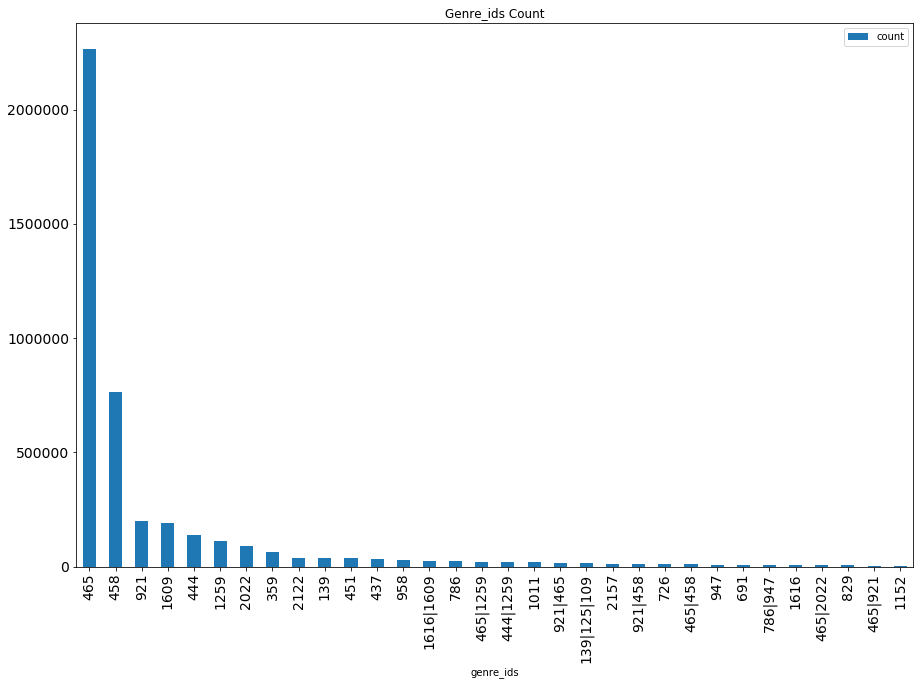

In [83]:
i_lst=[]
cnt_lst=[]
val_lst=[]
for i ,(val, cnt) in enumerate(music_tbl['genre_ids'].value_counts().iteritems()):
    i_lst.append(i)
    cnt_lst.append(cnt)
    val_lst.append(val)
i_lst=np.array(i_lst)
cnt_lst=np.array(cnt_lst)
val_lst=np.array(val_lst)

idx=np.argsort(cnt_lst)[::-1]
type(val_lst)
type(cnt_lst)
aa=pd.DataFrame({'count':cnt_lst[idx].tolist(),'genre_ids':val_lst[idx].tolist()})

#Display Genre_ids which is count is higher than 5000.
aa[aa['count']>5000].set_index('genre_ids').plot.bar(figsize=(15,10)
                                                     ,title='Genre_ids Count'
                                                     , fontsize=14)
plt.xticks(rotation=90)

plt.show()

####"Genre_ids": This attribute tells us which Genre the songs fall into. The dataset includes over 30 types of genre_ids. So that I have filtered out low counts genres which means the above plot only shows those genres appears in the dataset more than 5000 times or more. Similar to other attributes, KKBox did not reveal the real name of the genres. As we seen above, some of the genres code represent 2 types of genres combined. The most popular genre which is 465 is about 3 fold of the second place genre (i.e.458). Since the result is so skewed, so that I decided to only looked into the genre_ids 465 and 458 ONLY in the classification analysis.

In [237]:
music_tbl2 = music_tbl[(music_tbl['genre_ids']=="465") | (music_tbl['genre_ids']=="458")]
music_tbl2.shape

(4978940, 18)

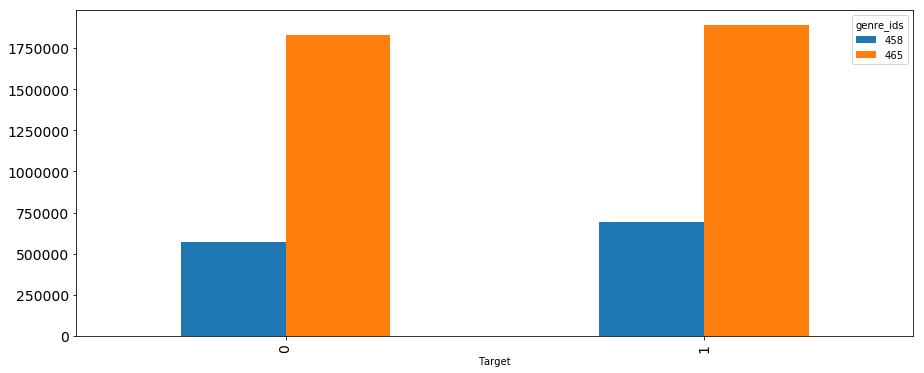

genre_ids,458,465
Target,,
0,569513,1829513
1,691697,1888217


In [258]:
np.set_printoptions(precision=2, linewidth=200, suppress=False)
cro_tar_genre=pd.crosstab(music_tbl2['Target'],music_tbl2['genre_ids'])
cro_tar_genre.plot.bar(figsize=(15,6),fontsize=14)
plt.show()
cro_tar_genre

####The above is the plot shows the genre_ids react in the Target group. As we seen, there are NOT  much differeniation between the Target group. Genre 458, 465 are very closed to each other. So that the genre_ids would not be added to the following classification analysis.

###The following is the plot for "artist name"

        artist_name   count
0   Various Artists  303617
1    周杰倫 (Jay Chou)  186776
2      五月天 (Mayday)  182088
3      林俊傑 (JJ Lin)  115325
4        田馥甄 (Hebe)  104946
5        aMEI (張惠妹)   82799
6  陳奕迅 (Eason Chan)   76035
7               玖壹壹   70445
8         G.E.M.鄧紫棋   67297
9           BIGBANG   61927


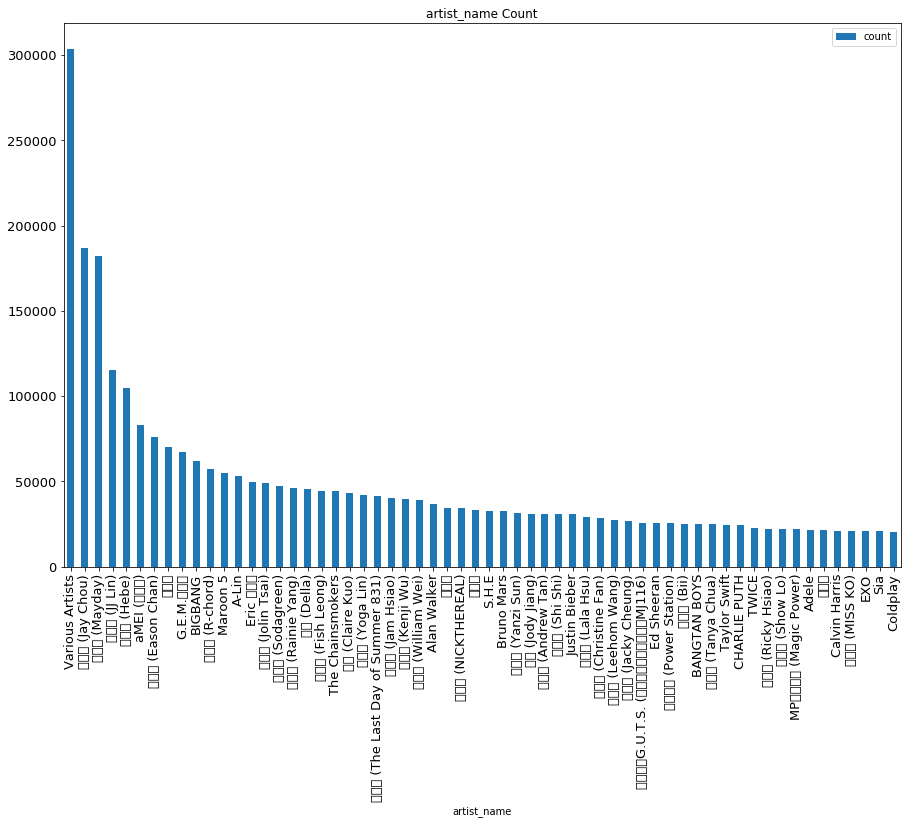

In [266]:
i_lst=[]
cnt_lst=[]
val_lst=[]
for i ,(val, cnt) in enumerate(music_tbl['artist_name'].value_counts().iteritems()):
    i_lst.append(i)
    cnt_lst.append(cnt)
    val_lst.append(val)
i_lst=np.array(i_lst)
cnt_lst=np.array(cnt_lst)
val_lst=np.array(val_lst)

idx=np.argsort(cnt_lst)[::-1]
type(val_lst)
type(cnt_lst)
aa=pd.DataFrame({'count':cnt_lst[idx].tolist(),'artist_name':val_lst[idx].tolist()})

print(aa[0:10])

#Display Genre_ids which is count is higher than 10000.
aa[aa['count']>20000].set_index('artist_name').plot.bar(figsize=(15,10)
                                                        ,title='artist_name Count'
                                                        ,fontsize=13)
plt.xticks(rotation=90)
plt.show()

####Artist_name: This plot shows the most famous artist's song in the through KKBox app. I would say that the result quite makes sense to me. If people likes to listen Asian music, they would know that Jay Chou and Mayday are super popular in Asian countries. And their counts are almost double of others except the first highest count category which is "Various Artists" includes all the mix artist singers. The next few high ranked artist are Eason Chan and G.E.M. are also popular in Asian countries. In my opinion, artist would be a very crucial way to decide whether the songs are popular in most of the case, so that I would focus the following classification analysis based on the top 10 singers.

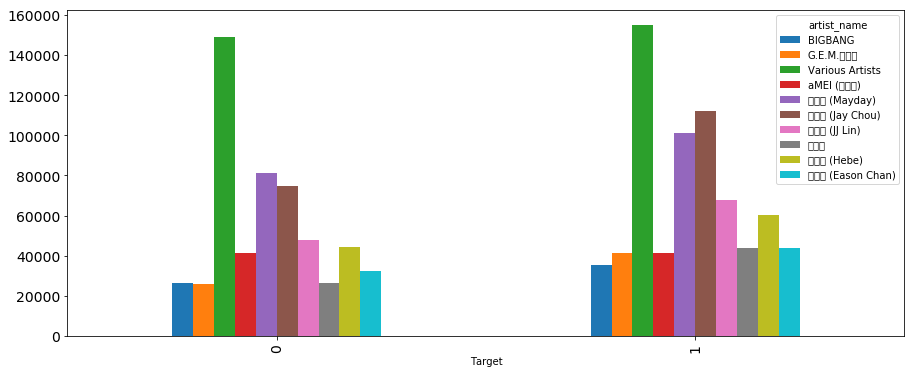

artist_name,BIGBANG,G.E.M.鄧紫棋,Various Artists,aMEI (張惠妹),五月天 (Mayday),周杰倫 (Jay Chou),林俊傑 (JJ Lin),玖壹壹,田馥甄 (Hebe),陳奕迅 (Eason Chan)
Target,,,,,,,,,,
0,26610,25873,148818,41301,81061,74549,47704,26481,44465,32140
1,35317,41424,154799,41498,101027,112227,67621,43964,60481,43895


In [275]:
music_tbl3 = music_tbl[(music_tbl['artist_name']=="Various Artists")
          | (music_tbl['artist_name']=="周杰倫 (Jay Chou)") 
          | (music_tbl['artist_name']=="五月天 (Mayday)") 
          | (music_tbl['artist_name']=="林俊傑 (JJ Lin)") 
          | (music_tbl['artist_name']=="五月天 (Mayday)") 
          | (music_tbl['artist_name']=="田馥甄 (Hebe)")
          | (music_tbl['artist_name']=="aMEI (張惠妹)") 
          | (music_tbl['artist_name']=="陳奕迅 (Eason Chan)")
          | (music_tbl['artist_name']=="玖壹壹" )
          | (music_tbl['artist_name']=="G.E.M.鄧紫棋") 
          | (music_tbl['artist_name']=="BIGBANG")
         ]

np.set_printoptions(precision=2, linewidth=200, suppress=False)
cro_tar_artist=pd.crosstab(music_tbl3['Target'],music_tbl3['artist_name'])
cro_tar_artist.plot.bar(figsize=(15,6),fontsize=14)
plt.show()
cro_tar_artist


####The above is the extracted top 10 artist plot group by Target, we could observe that there is not quite able to differeniate the Target group by the artist since their counts are very similar, especially for the most high ranked artist group "Various Artists". So that I would not include this "artist_name" attribute in the following classification analysis.

In [ ]:
###Target vs source_system_tab Plot

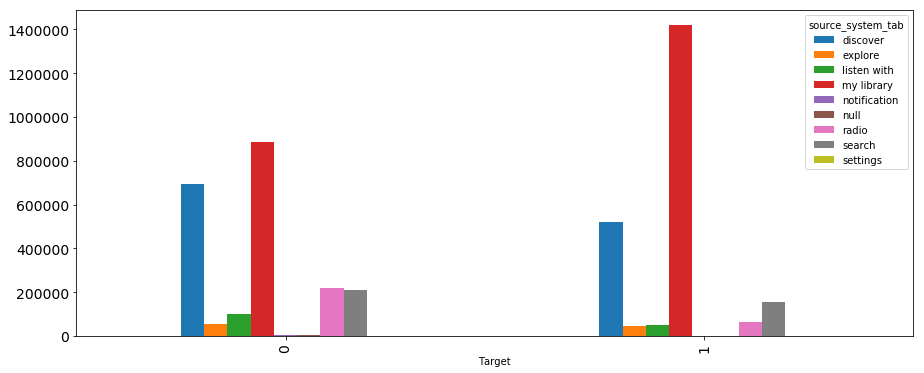

source_system_tab,discover,explore,listen with,my library,notification,null,radio,search,settings
Target,,,,,,,,,
0,694336,55173,98083,884619,2467,2654,217752,210600,708
1,520595,44875,49906,1418450,1470,1866,64868,153338,1039


In [57]:
np.set_printoptions(precision=2, linewidth=200, suppress=False)
cro_tar_sst=pd.crosstab(music_tbl['Target'],music_tbl['source_system_tab'])
cro_tar_sst.plot.bar(figsize=(15,6),fontsize=14)
plt.show()
cro_tar_sst

####The above plot shows us that Target 0 and 1 are differeniate between each other in terms of counts of source_system_tab. Especially the count of "my library" category in Target 1 is about 2 fold of Target 0. Apart from that, the rest of categories are also have significant different between Target group. So that I would choose source_system_tab as one of the predictor for the classification analysis.

###Target vs Source_type

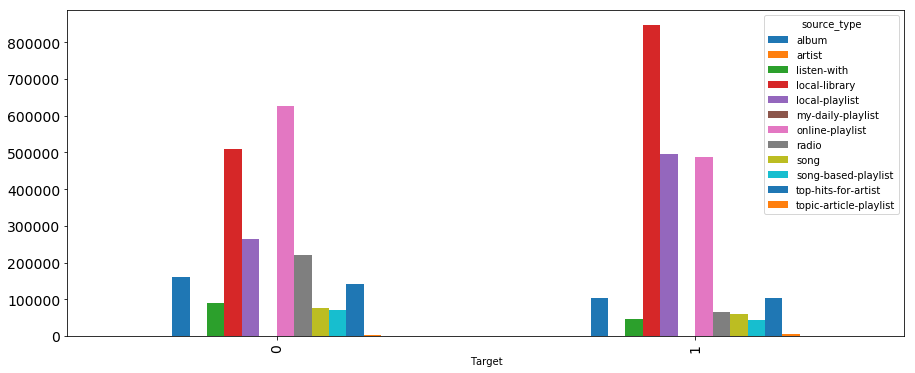

source_type,album,artist,listen-with,local-library,local-playlist,my-daily-playlist,online-playlist,radio,song,song-based-playlist,top-hits-for-artist,topic-article-playlist
Target,,,,,,,,,,,,
0,161283,710,90806,508902,263848,98,625402,221655,75096,71902,142273,3712
1,103986,1007,45219,846266,496251,68,487468,64709,59149,44746,102706,4110


In [60]:
cro_tar_st=pd.crosstab(music_tbl['Target'],music_tbl['source_type'])
cro_tar_st.plot.bar(figsize=(15,6),fontsize=14)
plt.show()
cro_tar_st

####Based on the above plot, we can obersve that the source_type could be differentiate between Target group (0,1). Especially the few higher ranked categories (local-library, local playlist etc). For this reason, I would add "source_type" attribute to the classification analysis. 

In [ ]:
###Target vs city

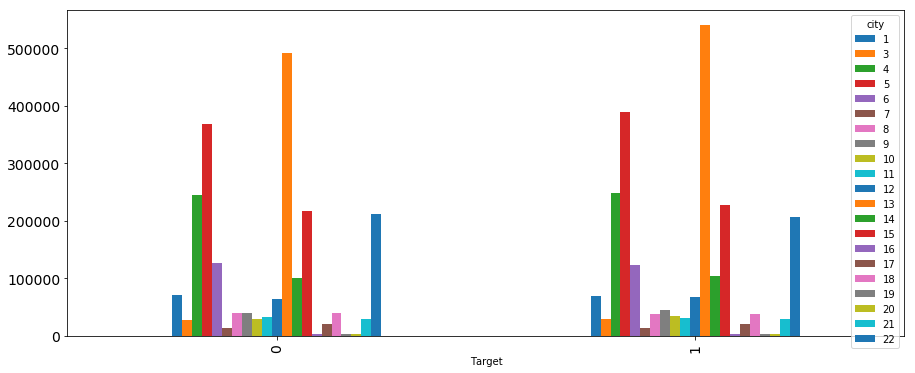

city,1,3,4,5,6,7,8,9,10,11,...,13,14,15,16,17,18,19,20,21,22
Target,,,,,,,,,,,,,,,,,,,,,
0,71144,27052,243958,367432,125832,13083,38962,40080,29357,32411,...,490631,99770,216789,3539,19973,39956,3706,2544,28905,212001
1,68979,28661,248840,388104,123751,13146,38228,45713,34248,30725,...,539564,104366,227238,3298,20909,37386,2823,3351,29802,205892


In [61]:
cro_tar_city=pd.crosstab(music_tbl['Target'],music_tbl['city'])
cro_tar_city.plot.bar(figsize=(15,6),fontsize=14)
plt.show()
cro_tar_city

####The above plot shows that the count of "city" category does not quite differentiate between the Target group. Also, 20 categories within the city group. So that I decide not adding city attribute to the classification process.

###Target vs Gender

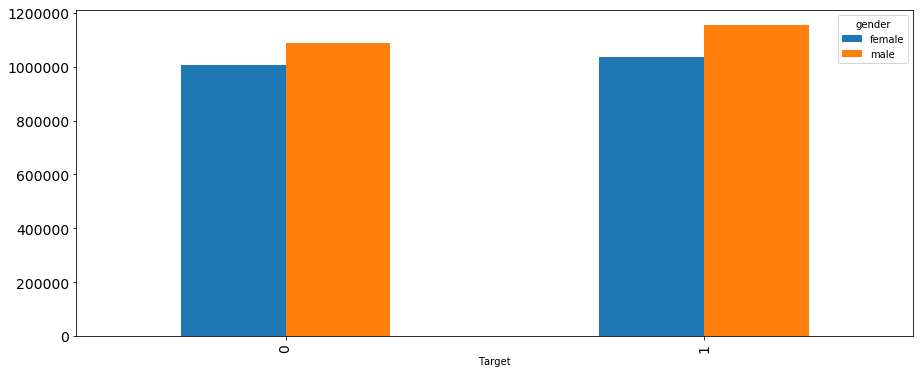

gender,female,male
Target,,
0,1007449,1089721
1,1035957,1153738


In [62]:
cro_tar_gender=pd.crosstab(music_tbl['Target'],music_tbl['gender'])
cro_tar_gender.plot.bar(figsize=(15,6),fontsize=14)
plt.show()
cro_tar_gender

####The above plot indicates tthat the counts of gender group is very similar between Target group 0 and 1. So that I would think that gender might not be a good indicator to be added to the classification analysis.

###Target vs registered_via

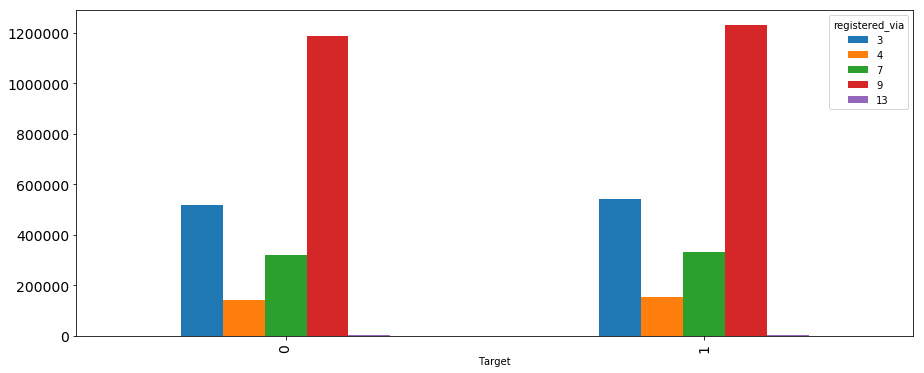

registered_via,3,4,7,9,13
Target,,,,,
0,518301,142592,319658,1189406,1870
1,543131,154674,333220,1230124,2144


In [63]:
cro_tar_rv=pd.crosstab(music_tbl['Target'],music_tbl['registered_via'])
cro_tar_rv.plot.bar(figsize=(15,6),fontsize=14)
plt.show()
cro_tar_rv

###As we see above, the "register_via" attribute have similar counts in both Target group 0 and 1. For this reason, there is a high chance that registered_via would not be a good predictor to classify Target group. In this case, I would not add this attribute to the classification analysis. 

###Target vs song_length

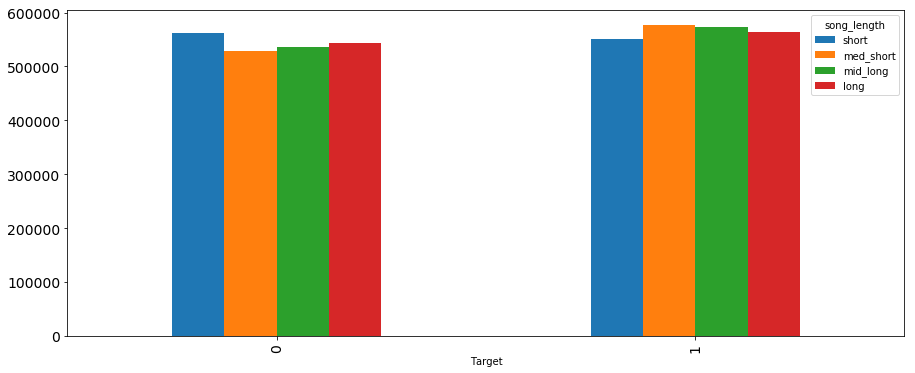

song_length,short,med_short,mid_long,long
Target,,,,
0,561897,529579,536734,543608
1,551183,576363,572535,563196


In [64]:
cro_tar_sl=pd.crosstab(music_tbl['Target'],music_tbl['song_length'])
cro_tar_sl.plot.bar(figsize=(15,6),fontsize=14)
plt.show()
cro_tar_sl

####The above song_length attribute was categorized into 4 groups in the previous steps. As we observe the above plot, we could find that the song_length attribute does not have much difference between Target group 0 and group 1.  This implies that song_length would not be a good predictor in the classification analysis. So that "song_length" attribute would not be added to the classification analysis. 

###Target vs Language

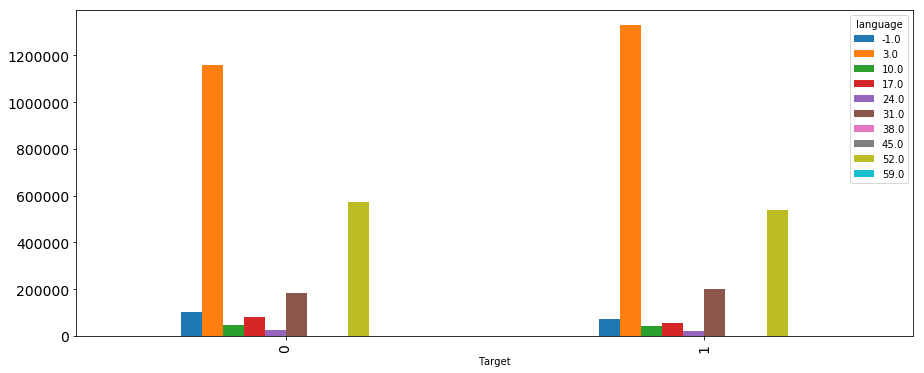

language,-1.0,3.0,10.0,17.0,24.0,31.0,38.0,45.0,52.0,59.0
Target,,,,,,,,,,
0,101484,1159752,48082,81746,25327,181822,61,668,571757,1119
1,74164,1328398,41155,56694,21890,199638,53,422,539676,1187


In [65]:
cro_tar_language=pd.crosstab(music_tbl['Target'],music_tbl['language'])
cro_tar_language.plot.bar(figsize=(15,6),fontsize=14)
plt.show()
cro_tar_language

####For this particular analysis, we focus on the dataset which built from Asian countries. Language of songs certainly a curial factor we should consider favor to the users. As we seen above the language 3.0 and 52.0 are basically the main trends of language of songs in KKBox. So that I would only extract these two categories' songs for the classification purpose.

In [138]:
np.set_printoptions(precision=2, linewidth=120, suppress=True)

music_tbl.groupby('Target').describe()

age          city      exp_date      language  \
Target                                                                 
0      count  3.662762e+06  3.662762e+06  3.662762e+06  3.662744e+06   
       mean   1.755013e+01  7.430372e+00  2.017139e+07  1.919697e+01   
       std    2.276344e+01  6.673605e+00  4.159684e+03  2.137405e+01   
       min   -4.300000e+01  1.000000e+00  1.970010e+07 -1.000000e+00   
       25%    0.000000e+00  1.000000e+00  2.017091e+07  3.000000e+00   
       50%    2.100000e+01  5.000000e+00  2.017092e+07  3.000000e+00   
       75%    2.900000e+01  1.300000e+01  2.017101e+07  5.200000e+01   
       max    1.051000e+03  2.200000e+01  2.020102e+07  5.900000e+01   
1      count  3.714656e+06  3.714656e+06  3.714656e+06  3.714636e+06   
       mean   1.752856e+01  7.591295e+00  2.017174e+07  1.803031e+01   
       std    2.029198e+01  6.608967e+00  3.552815e+03  2.096459e+01   
       min   -4.300000e+01  1.000000e+00  2.004102e+07 -1.000000e+00   
       25%    0.000000e+00  1.000000e+00  2.017091e+07  3.000000e+00   
       50%    2.100000e+01  5.000000e+00  2.017093e+07  3.000000e+00   
       75%    2.800000e+01  1.300000e+01  2.017101e+07  3.100000e+01   
       max    1.030000e+03  2.200000e+01  2.020102e+07  5.900000e+01   

                  reg_time  registered_via   song_length  
Target                                                    
0      count  3.662762e+06    3.662762e+06  3.662744e+06  
       mean   2.012817e+07    6.771395e+00  2.452441e+05  
       std    3.036962e+04    2.276317e+00  7.273728e+04  
       min    2.004033e+07    3.000000e+00  1.950000e+03  
       25%    2.011070e+07    4.000000e+00  2.135770e+05  
       50%    2.013102e+07    7.000000e+00  2.415800e+05  
       75%    2.015110e+07    9.000000e+00  2.723700e+05  
       max    2.017013e+07    1.300000e+01  7.621067e+06  
1      count  3.714656e+06    3.714656e+06  3.714636e+06  
       mean   2.012804e+07    6.816424e+00  2.450003e+05  
       std    2.997736e+04    2.275018e+00  6.156687e+04  
       min    2.004033e+07    3.000000e+00  1.393000e+03  
       25%    2.011071e+07    4.000000e+00  2.154570e+05  
       50%    2.013102e+07    7.000000e+00  2.420810e+05  
       75%    2.015101e+07    9.000000e+00  2.717770e+05  
       max    2.017013e+07    1.300000e+01  1.085171e+07

In [86]:
music_tbl.head(3)

,Unnamed: 0,customer_id,song_id,source_system_tab,source_screen_name,source_type,city,age,gender,registered_via,reg_time,exp_date,genre_ids,song_length,language,artist_name,composer,lyricist,Target
1,1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,13,31-45,female,9,20110525,20170911,1259,long,52.0,Various Artists,NaN,NaN,1
2,2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,13,31-45,female,9,20110525,20170911,1259,med_short,52.0,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,1
3,3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,13,31-45,female,9,20110525,20170911,1019,mid_long,-1.0,Soundway,Kwadwo Donkoh,NaN,1


#Dataset Cleaning

In [8]:
import pandas as pd
import numpy as np
#original_tbl=pd.read_csv('''query1.csv''', na_values=["?"])
#train_tbl=pd.read_csv('''que_train.csv''', na_values=["?"])
#songs_tbl=pd.read_csv('''que_songs.csv''', na_values=["?"])
#members_tbl=pd.read_csv('''que_members.csv''', na_values=["?"])
train2_tbl=pd.read_csv('''query2.csv''', na_values=["?"])

In [9]:
#Copy the original dataset to aother variable to avoid any changes to the original dataset
tbl=train2_tbl.copy()
print(tbl.shape)
tbl.head(3)

(7377380, 11)


,Unnamed: 0,customer_id,song_id,Target,source_system_tab,source_screen_name,source_type,gender,language,genre_ids,artist_name
0,0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,explore,Explore,online-playlist,NaN,52,359,Bastille
1,1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1,my library,Local playlist more,local-playlist,female,52,1259,Various Artists
2,2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1,my library,Local playlist more,local-playlist,female,52,1259,Nas


In [10]:
tbl.ix[0]

Unnamed: 0                                                       0
customer_id           FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=
song_id               BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=
Target                                                           1
source_system_tab                                          explore
source_screen_name                                         Explore
source_type                                        online-playlist
gender                                                         NaN
language                                                        52
genre_ids                                                      359
artist_name                                               Bastille
Name: 0, dtype: object

In [12]:
#Drop all the null values
tbl.drop(tbl[tbl['source_system_tab'].isnull()].index,axis=0,inplace=True)
tbl.drop(tbl[tbl['source_screen_name'].isnull()].index,axis=0,inplace=True)
tbl.drop(tbl[tbl['source_type'].isnull()].index,axis=0,inplace=True)
#tbl.drop(tbl[tbl['Target'].isnull()].index,axis=0,inplace=True)
tbl.drop(tbl[tbl['gender'].isnull()].index,axis=0,inplace=True)
tbl.drop(tbl[tbl['language'].isnull()].index,axis=0,inplace=True)
tbl.drop(tbl[tbl['genre_ids'].isnull()].index,axis=0,inplace=True)
tbl.drop(tbl[tbl['language']== -1.0].index, axis=0,inplace= True)
tbl.drop(tbl[tbl['language']== 10.0].index, axis=0,inplace= True)
tbl.drop(tbl[tbl['language']== 17.0].index, axis=0,inplace= True)
tbl.drop(tbl[tbl['language']== 24.0].index, axis=0,inplace= True)
tbl.drop(tbl[tbl['language']== 31.0].index, axis=0,inplace= True)
tbl.drop(tbl[tbl['language']== 38.0].index, axis=0,inplace= True)
tbl.drop(tbl[tbl['language']== 45.0].index, axis=0,inplace= True)
tbl.drop(tbl[tbl['language']== 59.0].index, axis=0,inplace= True)#Categorized the 'Age' attributes values to 4 category
#tbl['age']=pd.qcut(tbl.age,[0, .25, .5, .75, 1.],['child','young','mid-age','old']) 
#Categorized the "Song_Length" attributes values to 4 category
#tbl['song_length']=pd.qcut(tbl.song_length,[0, .25, .5, .75, 1.],['short','med_short','mid_long','long'])

In [13]:
tbl = tbl[(tbl['artist_name']=="Various Artists")
          | (tbl['artist_name']=="周杰倫 (Jay Chou)") 
          | (tbl['artist_name']=="五月天 (Mayday)") 
          | (tbl['artist_name']=="林俊傑 (JJ Lin)") 
          | (tbl['artist_name']=="五月天 (Mayday)") 
          | (tbl['artist_name']=="田馥甄 (Hebe)")
          | (tbl['artist_name']=="aMEI (張惠妹)") 
          | (tbl['artist_name']=="陳奕迅 (Eason Chan)")
          | (tbl['artist_name']=="玖壹壹" )
          | (tbl['artist_name']=="G.E.M.鄧紫棋") 
          | (tbl['artist_name']=="BIGBANG")
         ]

In [14]:
#Extract the 'Target' Class column 
tbl_target=tbl['Target']
print(tbl_target.shape)
tbl_target.head(3)

(607366,)


1     1
22    1
42    0
Name: Target, dtype: int64

In [15]:
#drop some of the attributes for now. 
tbl.drop('Unnamed: 0',axis=1,inplace=True)
tbl.drop('customer_id',axis=1,inplace=True)
tbl.drop('song_id',axis=1,inplace=True)
tbl.drop('genre_ids',axis=1,inplace=True)
tbl.drop('artist_name',axis=1,inplace=True)
tbl.drop('gender',axis=1,inplace=True)
tbl.drop('language',axis=1,inplace=True)
tbl.drop('Target',axis=1,inplace=True)




#tbl.drop('reg_time',axis=1,inplace=True)
#tbl.drop('exp_date',axis=1,inplace=True)
#tbl.drop('genre_ids',axis=1,inplace=True)
#tbl.drop('artist_name',axis=1,inplace=True)
#tbl.drop('composer',axis=1,inplace=True)
#tbl.drop('lyricist',axis=1,inplace=True)


In [16]:
print(tbl.shape)
tbl.head(3)

(607366, 3)


,source_system_tab,source_screen_name,source_type
1,my library,Local playlist more,local-playlist
22,my library,Local playlist more,local-library
42,my library,Local playlist more,local-library


In [10]:
#Turn 2 attributes into string before assigning dummy valuables
#tbl.registered_via=list(map(str, tbl.registered_via))
#tbl.language=list(map(str, tbl.language))

In [17]:
#turn all the categical variables into dummies valuables
tbl_dummies=pd.get_dummies(tbl[['source_system_tab'
                                ,'source_screen_name'
                                ,'source_type']])
print(tbl_dummies.shape)
tbl_dummies.head(5)

(607366, 40)


,source_system_tab_discover,source_system_tab_explore,source_system_tab_listen with,source_system_tab_my library,source_system_tab_notification,source_system_tab_null,source_system_tab_radio,source_system_tab_search,source_system_tab_settings,source_screen_name_Album more,...,source_type_listen-with,source_type_local-library,source_type_local-playlist,source_type_my-daily-playlist,source_type_online-playlist,source_type_radio,source_type_song,source_type_song-based-playlist,source_type_top-hits-for-artist,source_type_topic-article-playlist
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
22,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
42,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
60,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
61,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [36]:
#Normalizing the entire dataset.
#min_max_norm = lambda x: ((x-x.min()) / (x.max()-x.min())) if (x.dtypes==float or x.dtypes == int) else x
#tbl_dummies_norm = tbl_dummies.copy()
#tbl_dummies_norm = tbl_dummies_norm.apply(min_max_norm)
#tbl_dummies_norm.head(5)



In [18]:
#Find the correlation between attributes
corr_tbl=tbl_dummies.corr()
corr_tbl

,source_system_tab_discover,source_system_tab_explore,source_system_tab_listen with,source_system_tab_my library,source_system_tab_notification,source_system_tab_null,source_system_tab_radio,source_system_tab_search,source_system_tab_settings,source_screen_name_Album more,...,source_type_listen-with,source_type_local-library,source_type_local-playlist,source_type_my-daily-playlist,source_type_online-playlist,source_type_radio,source_type_song,source_type_song-based-playlist,source_type_top-hits-for-artist,source_type_topic-article-playlist
source_system_tab_discover,1.000000,-0.087975,-0.109335,-0.672204,-0.017523,-0.009060,-0.109937,-0.199001,-0.006686,0.021841,...,-0.101704,-0.402557,-0.286406,0.013636,0.733840,-0.107094,-0.074283,0.197067,-0.052181,-0.018369
source_system_tab_explore,-0.087975,1.000000,-0.025861,-0.158997,-0.004145,-0.002143,-0.026003,-0.047070,-0.001582,-0.014456,...,-0.022932,-0.097295,-0.068089,-0.001200,0.171184,-0.022127,-0.014254,-0.017498,-0.020187,0.234470
source_system_tab_listen with,-0.109335,-0.025861,1.000000,-0.197601,-0.005151,-0.002663,-0.032317,-0.058498,-0.001966,-0.045292,...,0.908232,-0.123666,-0.084296,-0.001491,-0.087969,-0.030953,0.034035,-0.021746,-0.031787,-0.005840
source_system_tab_my library,-0.672204,-0.158997,-0.197601,1.000000,-0.031669,-0.016373,-0.198688,-0.359653,-0.012084,-0.159069,...,-0.179323,0.604848,0.426395,-0.009166,-0.612548,-0.194215,-0.137460,-0.132480,-0.174117,-0.039033
source_system_tab_notification,-0.017523,-0.004145,-0.005151,-0.031669,1.000000,-0.000427,-0.005179,-0.009375,-0.000315,0.051135,...,0.015372,-0.014405,-0.013468,-0.000239,-0.003506,-0.005178,-0.002875,0.003231,-0.004344,-0.001060
source_system_tab_null,-0.009060,-0.002143,-0.002663,-0.016373,-0.000427,1.000000,-0.002678,-0.004847,-0.000163,-0.004035,...,-0.001218,0.010579,-0.001310,-0.000124,-0.004959,-0.002677,0.001072,-0.000875,-0.002744,-0.000548
source_system_tab_radio,-0.109937,-0.026003,-0.032317,-0.198688,-0.005179,-0.002678,1.000000,-0.058820,-0.001976,-0.044421,...,-0.028156,-0.125150,-0.085254,-0.001499,-0.105253,0.966424,-0.028123,-0.021866,-0.029283,-0.006136
source_system_tab_search,-0.199001,-0.047070,-0.058498,-0.359653,-0.009375,-0.004847,-0.058820,1.000000,-0.003578,0.290256,...,-0.052735,-0.219203,-0.153721,-0.002714,-0.039874,-0.053436,0.347483,-0.039580,0.418844,-0.011579
source_system_tab_settings,-0.006686,-0.001582,-0.001966,-0.012084,-0.000315,-0.000163,-0.001976,-0.003578,1.000000,0.010082,...,-0.001881,-0.006407,0.001014,-0.000091,0.001291,-0.001976,0.002945,-0.001330,-0.002025,-0.000404
source_screen_name_Album more,0.021841,-0.014456,-0.045292,-0.159069,0.051135,-0.004035,-0.044421,0.290256,0.010082,1.000000,...,-0.046609,-0.188683,-0.128314,-0.002259,-0.167524,-0.048289,-0.044262,-0.032952,-0.050177,-0.010019


####Based on the above, 
"source_type_online-playlist" and "source_system_tab_discover" is 0.726215
"source_system_tab_my library" and "source_type_local-library" is 0.641975
"source_type_radio" and "source_system_tab_radio" is 0.974851


In [33]:
tbl_dummies=pd.DataFrame(np.array(tbl_dummies))
tbl_target=pd.DataFrame(np.array(tbl_target))
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
tbl_train,tbl_test,tbl_train_target,tbl_test_target=train_test_split(tbl_dummies
                                                                     ,tbl_target
                                                                     ,test_size=0.2
                                                                     ,random_state=68)

In [34]:
#Double check the Training dataset
print(tbl_train.shape)
print(tbl_train_target.shape)
#Double check the Testing dataset
print(tbl_test.shape)
print(tbl_test_target.shape)

(485892, 40)
(485892, 1)
(121474, 40)
(121474, 1)


In [32]:
#Nornalizeing the Training and Testing dataset
#from sklearn import preprocessing
#np.set_printoptions(precision=2, linewidth=120, suppress=True)

#min_max_scaler = preprocessing.MinMaxScaler().fit(tbl_train)
#tbl_train_norm=min_max_scaler.transform(tbl_train)
#tbl_test_norm=min_max_scaler.transform(tbl_test)
#print(tbl_train_norm.shape)
#print(tbl_test_norm.shape)

In [35]:
tbl_train=np.array(tbl_train)
tbl_train[0:3]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [36]:
tbl_test=np.array(tbl_test)
tbl_test[0:3]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [37]:
tbl_train_target=np.array(tbl_train_target.iloc[:][0])
tbl_train_target[0:10]

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [38]:
tbl_test_target=np.array(tbl_test_target.iloc[:][0])
tbl_test_target[0:10]

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [39]:
#Double check the type Training dataset
print(type(tbl_train))
print(type(tbl_train_target))
#Double check the Testing dataset
print(type(tbl_test))
print(type(tbl_test_target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#Classification

In [72]:
###KNN Classifier (Using the Default Parameters)

In [26]:
#Import KNN classifier from sklearn
from sklearn import neighbors, tree, naive_bayes
import time

In [44]:
#This is the KNN Function for iterating the best K model
import matplotlib.pyplot as plt
def knn_func(K,tbl_train_norm,tbl_train_target,tbl_test_norm,tbl_test_target):
    k_min=5
    train_score_lst=[]
    test_score_lst=[]
    k_lst=[]
    
    for i in range(k_min,K+1):
        n_neighbors=i
        knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
        knnclf.fit(tbl_train_norm, tbl_train_target)
        k_lst.append(i)
        test_score_lst.append(knnclf.score(tbl_test_norm, tbl_test_target))
        train_score_lst.append(knnclf.score(tbl_train_norm, tbl_train_target))
        
        
    score_df=pd.DataFrame({'train_score':train_score_lst,'test_score':test_score_lst,"K":k_lst})
    score_df.plot(x='K',figsize=(10,5))
    plt.title('Training and Testing Score')
    plt.xlabel('K')
    plt.ylabel('Score')
    plt.xlim([k_min-1,K+1])
    plt.show()
    
    print ('Max Test score is ',max(test_score_lst),'with K = ',k_lst[test_score_lst.index(max(test_score_lst))])
    print ('Max Train score is ',max(train_score_lst))
    return max(test_score_lst), k_lst[test_score_lst.index(max(test_score_lst))]

In [42]:
tbl_train=tbl_train[1000:2000]
tbl_train_target=tbl_train_target[1000:2000]
tbl_test=tbl_test[300:500]
tbl_test_target=tbl_test_target[300:500]

In [47]:
print(tbl_train.shape)
print(tbl_train_target.shape)
print(tbl_test.shape)
print(tbl_test_target.shape)

(1000, 40)
(1000,)
(200, 40)
(200,)


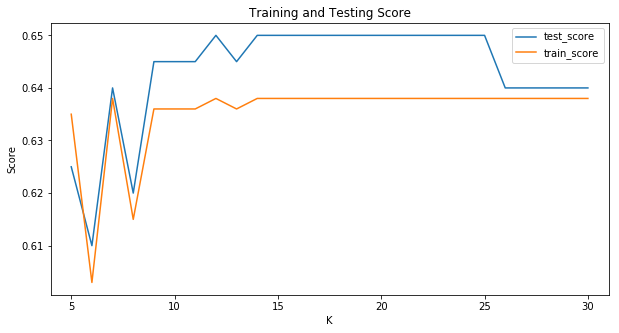

Max Test score is  0.65 with K =  12
Max Train score is  0.638


In [45]:
best_test_score, best_k=knn_func(30,tbl_train,tbl_train_target,tbl_test,tbl_test_target)

(0.65000000000000002, 12)

In [49]:
from sklearn.cross_validation import KFold

n = 10
kf = KFold(len(tbl_), n_folds=n)
xval_err = 0
for train,test in kf:
    best_test_score, best_k=knn_func(30,tbl_train[train],tbl_train_target[train],tbl_test[test],tbl_test_target[test])
    best_test_score_lst.append(best_test_score)
    best_k_lst.append(best_k)
    
idx = argsort(best_test_score_lst)
print(best_test_score_lst[idx])
print(best_test_score_lst[idx])


NameError: name 'x1' is not defined

###Navie Bayes (Gaussian) Classifier (Using the Default Parameters)

In [30]:
#Set up Naive_bayes Gaussian classifier
nbclf = naive_bayes.GaussianNB()
nbclf=nbclf.fit(tbl_train, tbl_train_target)

In [33]:
print('Train Score is',nbclf.score(tbl_train, tbl_train_target))
print('Test Score is',nbclf.score(tbl_test, tbl_test_target))

Train Score is 0.607118454307
Test Score is 0.606804748341


In [ ]:
print(tbl_dummies.shape)         
print(tbl_target.shape)

In [28]:
#10-fold Cross-Validation 
from sklearn import cross_validation
cv_scores = cross_validation.cross_val_score(nbclf, tbl_dummies,tbl_target[0], cv=10)
print('Overall Average accuracy: %f +/- %f'%(cv_scores.mean(),cv_scores.std()))

Overall Average accuracy: 0.600392 +/- 0.012393


###Decision Tree Classifier (Using the Default Parameters)

In [35]:
#Set up Decision Tree classifier
treeclf = tree.DecisionTreeClassifier(criterion='entropy')
#Plug in the train dataset with target class
treeclf = treeclf.fit(tbl_train, tbl_train_target)

In [37]:
print('Traing set score is',treeclf.score(tbl_train, tbl_train_target))
print('Testing set score is',treeclf.score(tbl_test, tbl_test_target))

Traing set score is 0.623704444609
Testing set score is 0.622380097799


In [39]:
#10-fold Cross-Validation 
from sklearn import cross_validation
cv_scores = cross_validation.cross_val_score(treeclf, tbl_dummies,tbl_target[0], cv=10)
print('Overall Average accuracy: %f +/- %f'%(cv_scores.mean(),cv_scores.std()))

Overall Average accuracy: 0.620150 +/- 0.024957


###Linear Discriminant Analysis (LDA)

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(tbl_train, tbl_train_target)

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [41]:
print('Traing set score is',ldclf.score(tbl_train, tbl_train_target))
print('Testing set score is',ldclf.score(tbl_test, tbl_test_target))

Traing set score is 0.620658500243
Testing set score is 0.620857138153


In [43]:
#10-fold Cross-Validation 
from sklearn import cross_validation
cv_scores = cross_validation.cross_val_score(ldclf, tbl_dummies,tbl_target[0], cv=10)
print('Overall Average accuracy: %f +/- %f'%(cv_scores.mean(),cv_scores.std()))

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warn

Overall Average accuracy: 0.619351 +/- 0.024136


/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


#kMeans

In [45]:
from sklearn.cluster import KMeans


In [ ]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
tbl_train,tbl_test,tbl_train_target,tbl_test_target=train_test_split(tbl_dummies
                                                                     ,tbl_target
                                                                     ,test_size=0.2
                                                                     ,random_state=28)

In [46]:
print(tbl_train.shape)
print(type(tbl_train))

(485892, 40)
<class 'numpy.ndarray'>


In [47]:
print(tbl_train_target.shape)
print(type(tbl_train_target))

(485892,)
<class 'numpy.ndarray'>


In [48]:
print(tbl_test.shape)
print(type(tbl_test))

(121474, 40)
<class 'numpy.ndarray'>


In [49]:
print(tbl_test_target.shape)
print(type(tbl_test_target))

(121474,)
<class 'numpy.ndarray'>


In [51]:
tbl_dummies = np.array(tbl_dummies)
print(tbl_dummies.shape)
print(type(tbl_dummies))

(607366, 40)
<class 'numpy.ndarray'>


In [57]:
tbl_target = np.array(tbl_target)
print(tbl_target.shape)
print(type(tbl_target))

(607366, 1)
<class 'numpy.ndarray'>


In [52]:
kmeans=KMeans(n_clusters=2,max_iter=500,verbose=0) #initialize clusters parameters
#Plug in the normalized data into the 
kmeans.fit(tbl_dummies)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [53]:
clusters=kmeans.predict(tbl_dummies)
print(len(clusters))
print(tbl_target.shape[0])

607366
607366


In [58]:
if len(clusters)==tbl_target.shape[0]:
    acc_count=0
    percent_acc=-1
    for i in range(len(clusters)):
        if clusters[i]==tbl_target[i]:
            acc_count+=1
    percent_acc=acc_count/len(tbl_target)
print("Accuaacy of K-Mean is ",percent_acc*100,"%")

Accuaacy of K-Mean is  59.827352864664796 %


In [ ]:
from sklearn.metrics import completeness_score, homogeneity_score

#Compute the Completness Score and Homogeneity Score
print('Completness Score is',completeness_score(clusters,np.array(tbl_target)))
print('Homogeneity Score is ',homogeneity_score(clusters, np.array(tbl_target)))

#KNN Classifier

In [67]:
tbl_dummies=pd.DataFrame(np.array(tbl_dummies))
tbl_target=pd.DataFrame(np.array(tbl_target))
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
tbl_train,tbl_test,tbl_train_target,tbl_test_target=train_test_split(tbl_dummies
                                                                     ,tbl_target
                                                                     ,test_size=0.2
                                                                     ,random_state=68)

In [68]:
import math
from collections import Counter
# x = the instance to be classified
# D = training data matrix
# C = Class of neighbor of training data 
# K is the number of neigbor
# measure is the method is used to calculation the similarity (0=Euclidean Dist, 1=Cosine)

def knn_classifier(x,D,c,K,measure):
    if measure == 0: 
        D=np.array(tbl_train)
        dists = np.sqrt(((D - x)**2).sum(axis=1))
        
        idx=np.argsort(dists)
        neighbor_class=c.iloc[idx[:K]]
        predict_class=Counter(neighbor_class[0]).most_common(1)

        return dists[idx[:K]],idx[:K],neighbor_class,predict_class[0][0]
    
    elif measure ==1:
        dot_pro = np.dot(D,x)
        x_norm = np.linalg.norm(x)
        D_norm = np.sqrt((D*D).sum(axis=1))#np.array([np.linalg.norm(D.iloc[i]) for i in range(len(D))])
        sims=dot_pro / (x_norm * D_norm)
        dists=np.array(1-sims)

        idx=np.argsort(dists)
        neighbor_class=c.iloc[idx[:K]]
        predict_class=Counter(neighbor_class[0]).most_common(1)
    
        return dists[idx[:K]],idx[:K],neighbor_class,predict_class[0][0]

    else:
        #Return nothing if Input of Measure is NOT 0 or 1.
        print("Measure must be 0 or 1")
        return 


In [69]:
def accuracy(train,train_class,test,test_class,K,measure):
    pre_class_array=np.array([])
    for i in range(len(test)):
        instance = np.array(test.iloc[i])
        dists,idx,neighbor_class,predict_class=knn_classifier(instance,train,train_class,K,measure)
        pre_class_array=np.append(pre_class_array,predict_class)

    if len(pre_class_array)==test_class.shape[0]:
        acc_count=0
        for i in range(len(pre_class_array)):
            if pre_class_array[i]==test_class.iloc[i][0]:
                acc_count+=1
        percent_acc=acc_count/len(test_class)
    
    return pre_class_array,percent_acc

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

def knn_accuracy(train ,train_target ,test,test_target,k_min,k_max,measure=1):
    
    k_max=(K_max+1)
    pre_class_array_lst=[]
    percent_acc_lst=[]
    K_lst=[]

    for num in range(k_min,k_max):
        pre_class_array,percent_acc=accuracy(train,train_target,test,test_target,num,measure)
        pre_class_array_lst.append(pre_class_array)
        percent_acc_lst.append(percent_acc)
        K_lst.append(num)
        
    accuracy_df=pd.DataFrame({'Accuracy':percent_acc_lst,"K":K_lst})
    accuracy_df.plot(x='K',figsize=(10,5))
    plt.title('KNN Accuracy')
    plt.xlabel('K Values')
    plt.ylabel('Accuracy')
    plt.xlim([k_min-1,k_max])
    plt.show()
    
    best_accuaracy=0.0
    best_k=-1
    best_class=np.array([])
    best_accuaracy = max(percent_acc_lst)
    best_k = K_lst[percent_acc_lst.index(max(percent_acc_lst))]
    best_class = pre_class_array_lst[percent_acc_lst.index(max(percent_acc_lst))]
    
    
    print ('Max Accuracy score is ',best_accuaracy,'with K = ',best_k)
    
    return best_k, best_class


In [113]:
D=tbl_train[37000:39000]
c=tbl_train_target[37000:39000]
K_min=16
K_max=25
measure = 1


best_k=-1
best_class=np.array([])

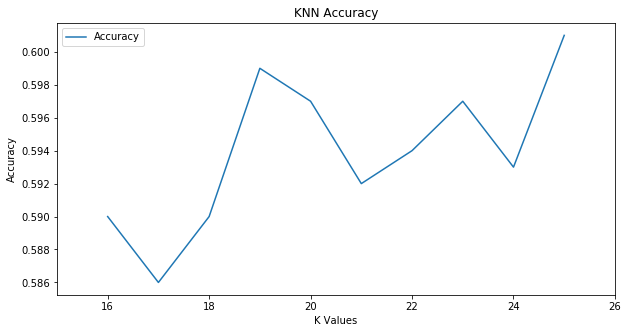

Max Accuracy score is  0.601 with K =  25


In [114]:
best_k, best_class = knn_accuracy(D,c,tbl_test[6000:7000],tbl_test_target[6000:7000],K_min,K_max,1)
